## Dataset Exploartion and Testing

In [1]:
import pandas as pd
from datasets import load_dataset

def load_huggingface_dataset(dataset: str, split="train"):
    """
    Load the specified dataset from huggingface:

    Args:
        - dataset: HuggingFace dataset name.
    Returns:
        - Pandas DataFrame containing the dataset split.
     
    """
    ds = load_dataset(dataset)
    
    return to_dataframe(ds, split) 

def to_dataframe(dataset, split):
    """
    Convert the specified split of the dataset to a pandas DataFrame.
    Args:
        - dataset: Loaded Hugging Face dataset.
        - split: Dataset split to convert (e.g., 'train', 'validation').
    Returns:
        - Pandas DataFrame containing the dataset split.
    """
    # Convert the specified split to a pandas DataFrame
    df = dataset[split].to_pandas()
    return df


/home/iailab43/khanm2/ir_lab/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
squad_df_val = load_huggingface_dataset("rajpurkar/squad", split='validation')
squad_df_train = load_huggingface_dataset("rajpurkar/squad", split='train')


OpenBLAS WARNING - could not determine the L2 cache size on this system, assuming 256k
Generating validation split: 100%|██████████| 10570/10570 [00:00<00:00, 101954.50 examples/s]


In [3]:
len(squad_df_val), len(squad_df_train)

(10570, 87599)

In [4]:
merged_df_val = (
    squad_df_val.groupby('context', as_index=False)
    .agg({
        'id': lambda x: list(x),          # Combine IDs into a list
        'title': 'first',                 # Take the first title (assuming all titles are the same for the same context)
        'question': list,                 # Combine questions into a list
        'answers': list                   # Combine answers into a list
    })
)

merged_df_train = (
    squad_df_train.groupby('context', as_index=False)
    .agg({
        'id': lambda x: list(x),          # Combine IDs into a list
        'title': 'first',                 # Take the first title (assuming all titles are the same for the same context)
        'question': list,                 # Combine questions into a list
        'answers': list                   # Combine answers into a list
    })
)

# Display the resulting DataFrame
len(merged_df_val), len(merged_df_train)

(2067, 18891)

In [41]:
for i, row in merged_df.iterrows():
    print(row['question'])
    print(row['answers'])
    break

Which NASA faction came around first to support the LOR?
{'text': array(['Manned Spacecraft Center', 'Manned Spacecraft Center',
       'Manned Spacecraft Center', 'Manned Spacecraft Center'],
      dtype=object), 'answer_start': array([578, 578, 578, 578], dtype=int32)}


## Graph Creation Testing

In [31]:
summaries = [
    {'Entity': 'CANBERRA', 'Type': 'GEO', 'Summary': "The event, held in the capital city of Canberra, Australia, showcased the cultural significance of the city. The central areas of Canberra played host to the event, which featured an exchange between Agnes Shea, a local representative, and Chinese officials, highlighting the city's efforts to foster cross-cultural understanding and acknowledge the contributions of its Aboriginal people."
    },
    {'Entity': 'AUSTRALIAN CAPITAL TERRITORY', 'Type': 'GEO', 'Summary': "The event took place in the Australian Capital Territory, a region in the heart of Australia, in Canberra's central areas. It is within this region that Agnes Shea offered a message stick to Chinese officials on behalf of the Aboriginal people, symbolizing a connection between the territory and the broader Australian community. This event highlights the importance of the Australian Capital Territory as a hub for cultural exchange and understanding."
    },
    {'Entity': 'AGNES SHEA', 'Type': 'PERSON', 'Summary': 'Agnes Shea is a local Aboriginal elder who has offered message sticks to Chinese officials on behalf of the Tibetan and Aboriginal people of Australia, the Australian Capital Territory, and Canberra. Her actions serve as a symbol of reconciliation and bridge-building between cultures.'
    },
    {'Entity': 'COMMONWEALTH PARK', 'Type': 'GEO', 'Summary': 'The Commonwealth Park, a popular recreational area in Canberra, served as the venue for a significant event. The event took place in the park, utilizing its facilities and amenities to host the gathering.'
    },
    {'Entity': 'RECONCILIATION PLACE', 'Type': 'GEO', 'Summary': 'The RECONCILIATION PLACE, a venue in Canberra, served as the site for the event. Located in this place, the gathering took place.'
    },
    {'Entity': 'TIBET', 'Type': 'GEO', 'Summary': 'Tibet, a country located in the Himalayan region, has been the subject of historical and contemporary diplomatic efforts. In a significant gesture, Agnes Shea, an individual advocating for the Tibetan cause, offered a message stick to Chinese officials, underscoring the ongoing struggle for recognition and autonomy by the Tibetan people. This event highlights the complex relationships between Tibet and its external stakeholders, including China.'
    }
]

In [32]:
entities = [
    {'name': 'CANBERRA', 'type': 'GEO', 'description': 'Capital city in Australia'
    },
    {'name': 'AUSTRALIAN CAPITAL TERRITORY', 'type': 'GEO', 'description': 'Region in Australia'
    },
    {'name': 'AGNES SHEA', 'type': 'PERSON', 'description': 'Local Aboriginal elder'
    },
    {'name': 'COMMONWEALTH PARK', 'type': 'GEO', 'description': 'Park in Canberra'
    },
    {'name': 'RECONCILIATION PLACE', 'type': 'GEO', 'description': 'Place in Canberra'
    },
    {'name': 'TIBET', 'type': 'GEO', 'description': 'Country'
    }
]
relationships =[
    {'source': 'AGNES SHEA', 'target': 'TIBET', 'relationship': 'Agnes Shea offered a message stick to the Chinese officials on behalf of the Tibetan people', 'relationship_strength': 6
    },
    {'source': 'AUSTRALIAN CAPITAL TERRITORY', 'target': 'CANBERRA', 'relationship': "The event took place in Canberra's central areas", 'relationship_strength': 2
    },
    {'source': 'AUSTRALIAN CAPITAL TERRITORY', 'target': 'AUSTRALIA', 'relationship': 'The event took place in the Australian Capital Territory', 'relationship_strength': 2
    },
    {'source': 'AUSTRALIA', 'target': 'AUSTRALIAN CAPITAL TERRITORY', 'relationship': 'The event took place in Australia', 'relationship_strength': 2
    },
    {'source': 'AGNES SHEA', 'target': 'AUSTRALIAN CAPITAL TERRITORY', 'relationship': 'Agnes Shea offered a message stick to the Chinese officials on behalf of the Aboriginal people of the Australian Capital Territory', 'relationship_strength': 6
    },
    {'source': 'AGNES SHEA', 'target': 'CANBERRA', 'relationship': 'Agnes Shea offered a message stick to the Chinese officials on behalf of the Aboriginal people of Canberra', 'relationship_strength': 6
    },
    {'source': 'AUSTRALIAN CAPITAL TERRITORY', 'target': 'COMMONWEALTH PARK', 'relationship': 'The event took place in the park', 'relationship_strength': 2
    },
    {'source': 'AUSTRALIAN CAPITAL TERRITORY', 'target': 'RECONCILIATION PLACE', 'relationship': 'The event took place in the place', 'relationship_strength': 2
    },
    {'source': 'AUSTRALIA', 'target': 'TIBET', 'relationship': 'The event was held in Tibet', 'relationship_strength': 2
    },
    {'source': 'AGNES SHEA', 'target': 'TIBET', 'relationship': 'Agnes Shea offered a message stick to the Chinese officials on behalf of the Tibetan people', 'relationship_strength': 6
    },
    {'source': 'AGNES SHEA', 'target': 'AUSTRALIA', 'relationship': 'Agnes Shea offered a message stick to the Chinese officials on behalf of the Aboriginal people of Australia', 'relationship_strength': 6
    },
    {'source': 'AUSTRALIAN CAPITAL TERRITORY', 'target': 'AUSTRALIA', 'relationship': 'The event took place in Australia', 'relationship_strength': 2
    }
]

In [33]:
import networkx as nx
import community as community_louvain

from pipeline.preprocessing.graph_communities import generate_graph

global_graph = nx.Graph()

local_graph = generate_graph(relationships, summaries, entities)
global_graph = nx.compose(local_graph, global_graph)

## We use the louvain algorithm for community generation
partition = community_louvain.best_partition(global_graph, weight='strength')

# Add community information as node attributes
for node, community_id in partition.items():
	global_graph.nodes[node]['community_id'] = community_id  # Store community ID as node attribute

# Optional: If you want to keep track of the communities in a separate dictionary for reference
communities = {}
for node, community_id in partition.items():
	communities.setdefault(community_id, []).append(node)

In [38]:
communities

{0: ['CANBERRA', 'AGNES SHEA', 'TIBET'],
 1: ['AUSTRALIAN CAPITAL TERRITORY',
  'COMMONWEALTH PARK',
  'RECONCILIATION PLACE']}

In [51]:
for community, nodes in communities.items():
	entities = []
	summary = []
	for node in nodes:
		print(global_graph.nodes[node])
		break		
    

{'type': 'GEO', 'description': "The event, held in the capital city of Canberra, Australia, showcased the cultural significance of the city. The central areas of Canberra played host to the event, which featured an exchange between Agnes Shea, a local representative, and Chinese officials, highlighting the city's efforts to foster cross-cultural understanding and acknowledge the contributions of its Aboriginal people.", 'community_id': 0}
{'type': 'GEO', 'description': "The event took place in the Australian Capital Territory, a region in the heart of Australia, in Canberra's central areas. It is within this region that Agnes Shea offered a message stick to Chinese officials on behalf of the Aboriginal people, symbolizing a connection between the territory and the broader Australian community. This event highlights the importance of the Australian Capital Territory as a hub for cultural exchange and understanding.", 'community_id': 1}


In [55]:
for community_id, nodes in communities.items():
	# Extract relevant information from the community
	entities = []
	text_summaries = []


	for node in nodes:
		entities.append(node)
		if 'description' in global_graph.nodes[node]:
			text_summaries.append(global_graph.nodes[node]['description'])
	entity_list = ", ".join(entities)
	raw_text = " ".join(text_summaries)
 
print(f'ENTITIES: {entity_list}')
print(f'SUMMARIES: {raw_text}')


ENTITIES: AUSTRALIAN CAPITAL TERRITORY, COMMONWEALTH PARK, RECONCILIATION PLACE
SUMMARIES: The event took place in the Australian Capital Territory, a region in the heart of Australia, in Canberra's central areas. It is within this region that Agnes Shea offered a message stick to Chinese officials on behalf of the Aboriginal people, symbolizing a connection between the territory and the broader Australian community. This event highlights the importance of the Australian Capital Territory as a hub for cultural exchange and understanding. The Commonwealth Park, a popular recreational area in Canberra, served as the venue for a significant event. The event took place in the park, utilizing its facilities and amenities to host the gathering. The RECONCILIATION PLACE, a venue in Canberra, served as the site for the event. Located in this place, the gathering took place.


In [ ]:
def generate_summary_with_llm(model, tokenizer, device, prompt):
    """
    Generate a summary using the LLM.
    """
    # Tokenize and generate response
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    outputs = model.generate(
        inputs['input_ids'], 
        max_new_tokens=2000, 
        do_sample=True, 
        temperature=0.7,
        eos_token_id=tokenizer.eos_token_id
    )

    response_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    print(f'RESPONSE FROM COMMUNITY SUMMARY: {response_text}')
    return response_text

In [4]:
summary0 = "This community involves key figures and locations engaged in cross-cultural exchanges. Canberra, Australia's capital, hosted an event that brought together Agnes Shea, a local Aboriginal elder, and Chinese officials. Agnes Shea, who advocates for both the Tibetan and Aboriginal causes, symbolized reconciliation by offering message sticks to the Chinese, highlighting the struggles of the Tibetan people for recognition and autonomy. The event underscored the city's role in fostering cultural understanding and addressing historical tensions."

summary1 = "This community consists of key geographical locations in Canberra, Australia, all central to an event that symbolizes cultural exchange. The Australian Capital Territory hosted the event, marking its role as a hub for connections between the Aboriginal people and broader Australian society. The Commonwealth Park, a prominent recreational area, provided the venue, and Reconciliation Place served as the site for the gathering, further emphasizing the region's commitment to reconciliation and cultural understanding."

summaries = [summary0, summary1]

In [7]:
import json
community_summaries = {}

for community_id in communities:
    summary = summaries[community_id] 
    community_summaries[community_id] = summary
    
community_summaries
    
with open("output/community_summaries.json", "w") as f:
	json.dump(community_summaries, f)

# len(communities)

In [8]:
nx.write_gexf(global_graph, "output/graph.gexf") 

In [30]:
G = nx.read_gexf("output/graph.gexf")

communities = {}

with open("output/community_summaries.json", "r") as f:
    community_summaries = json.load(f)

for node, data in global_graph.nodes(data=True):
    community_id = str(data.get('community_id'))
    print(community_summaries[community_id])
    
#     community_id = data.get('community')  # Adjust this if the attribute name is different
#     if community_id is not None:
#         communities.setdefault(community_id, []).append(node)

# # Display the communities textually
# for community_id, nodes in communities.items():
#     print(f"Community {community_id}:")
#     print(f"  Nodes: {nodes}\n")

This community involves key figures and locations engaged in cross-cultural exchanges. Canberra, Australia's capital, hosted an event that brought together Agnes Shea, a local Aboriginal elder, and Chinese officials. Agnes Shea, who advocates for both the Tibetan and Aboriginal causes, symbolized reconciliation by offering message sticks to the Chinese, highlighting the struggles of the Tibetan people for recognition and autonomy. The event underscored the city's role in fostering cultural understanding and addressing historical tensions.
This community consists of key geographical locations in Canberra, Australia, all central to an event that symbolizes cultural exchange. The Australian Capital Territory hosted the event, marking its role as a hub for connections between the Aboriginal people and broader Australian society. The Commonwealth Park, a prominent recreational area, provided the venue, and Reconciliation Place served as the site for the gathering, further emphasizing the re

## Graph Representations and Visualizations

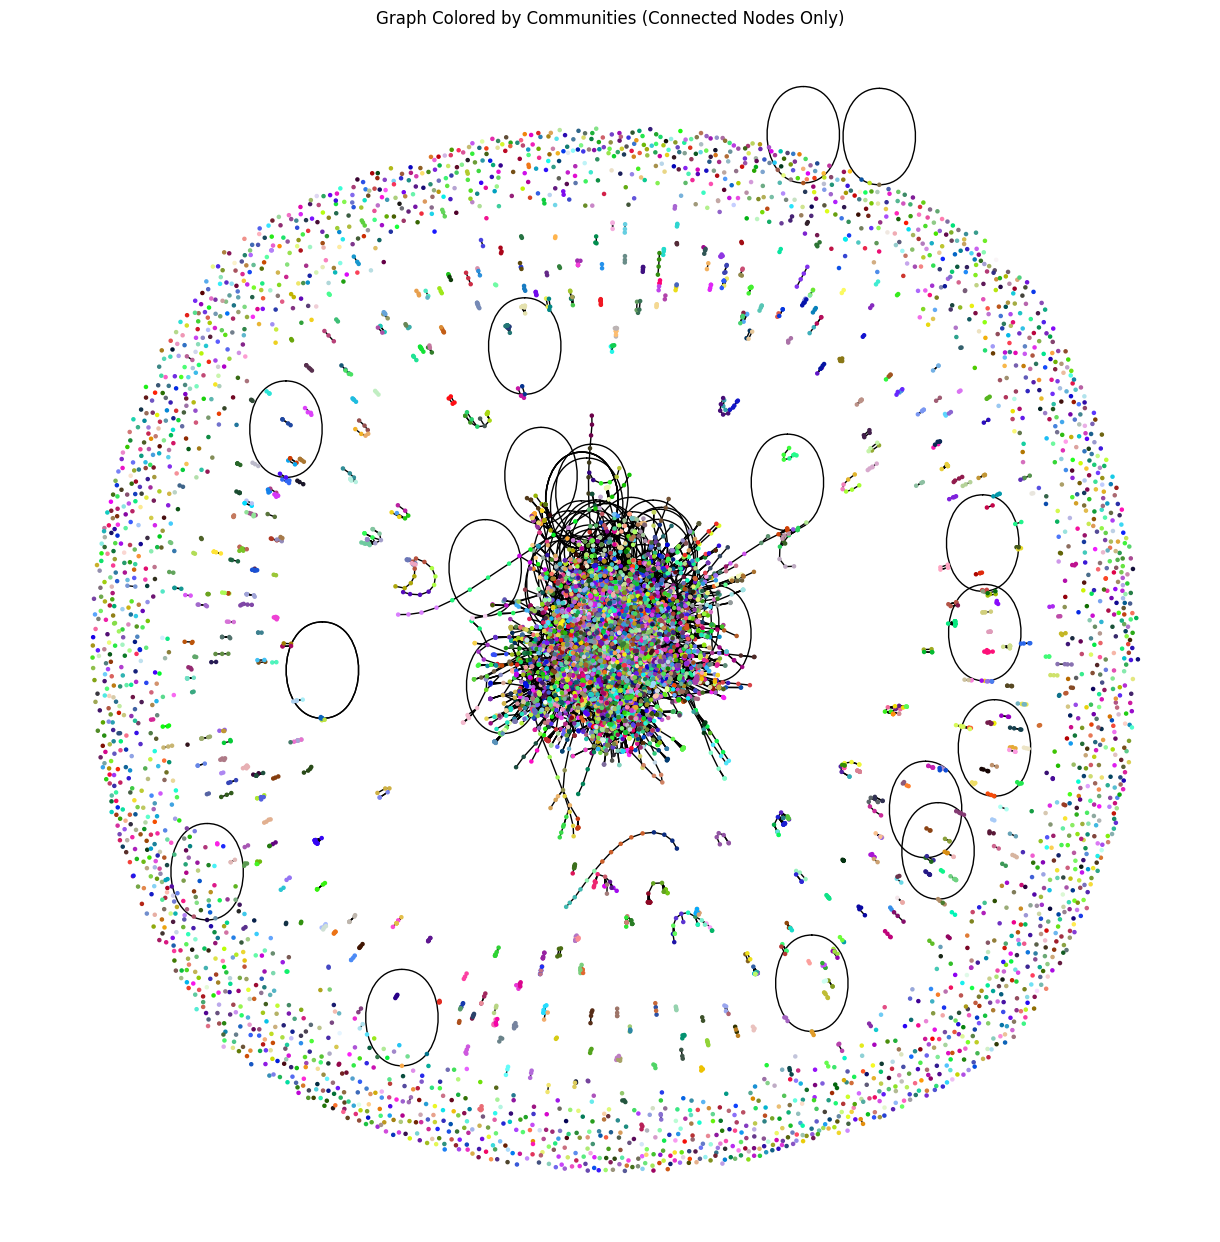

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load the graph from the GEXF file
G = nx.read_gexf("output/graph_valid.gexf")

# Filter out isolated nodes (degree = 0)
# connected_nodes = [node for node in G.nodes() if G.degree(node) > 0]
# H = G.subgraph(connected_nodes)  # Create a subgraph with only connected nodes

# Extract community IDs from node attributes
# Assuming the community ID is stored in an attribute called 'community_id'
community_map = {node: data['community_id'] for node, data in G.nodes(data=True)}

# Get unique community IDs
unique_communities = set(community_map.values())

# # Print the total number of nodes and communities
# print(f"Total number of nodes (connected only): {G.number_of_nodes()}")
# print(f"Total number of communities: {len(unique_communities)}")

# Assign a random color to each community
community_colors = {community_id: f'#{random.randint(0, 0xFFFFFF):06x}' for community_id in unique_communities}
node_colors = [community_colors[community_map[node]] for node in G.nodes()]

# Draw the graph with community-based coloring
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(
    G, pos, with_labels=False, node_size=5, node_color=node_colors
)

plt.title("Graph Colored by Communities (Connected Nodes Only)")
plt.show()


In [3]:
import networkx as nx

G = nx.read_gexf("output/graph_valid.gexf")

community_map = {node: data['community_id'] for node, data in G.nodes(data=True)}

# Get unique community IDs
unique_communities = set(community_map.values())

print(f"Total number of nodes (connected only): {G.number_of_nodes()}")
print(f"Total number of communities: {len(unique_communities)}")
print(f"Total number of relations: {G.number_of_edges()}")

print(f"Clustering Cooefficient: {nx.average_clustering(G)}")

disconnected_nodes = [node for node in G.nodes if G.degree(node) == 0]
print("Number of disconnected nodes:", len(disconnected_nodes))



Total number of nodes (connected only): 11684
Total number of communities: 5760
Total number of relations: 14340
Clustering Cooefficient: 0.2252489425639963
Number of disconnected nodes: 2629


In [10]:
from collections import defaultdict

# Create a dictionary to store nodes in each community
community_groups = defaultdict(list)
for node, community_id in community_map.items():
    # if G.degree(node) != 0:
    	community_groups[community_id].append(node) 

# Calculate the size of each community
community_sizes = [len(nodes) for nodes in community_groups.values()]

# Compute the average size of communities
average_nodes_per_community = sum(community_sizes) / len(community_sizes)

print("Average number of nodes per community:", average_nodes_per_community)

Average number of nodes per community: 2.0284722222222222


In [ ]:
print(f"Degree Centrality: {nx.degree_centrality(G)}")

Degree Centrality: {'STRESS-TENSOR': 0.00017118890695882907, 'FORCE': 0.0010271334417529744, 'TENSOR': 0.00017118890695882907, 'AREA': 0.00034237781391765814, 'VOLUME': 0.0002567833604382436, 'CENTRIFUGAL FORCE': 0.0, 'UNIT VECTOR': 0.0, 'CIRCULAR PATH': 0.0002567833604382436, 'UNBALANCED CENTRIPEATAL FORCE': 8.559445347941454e-05, 'MAGNETIC FORCE': 8.559445347941454e-05, 'GRAVITY': 0.0009415389882735599, 'TANGENTIAL FORCE': 8.559445347941454e-05, 'RADIAL FORCE': 8.559445347941454e-05, 'VELOCITY VECTOR': 0.0006847556278353163, 'CENTRIFUGAL ACCELERATION': 0.0, 'RADIAL ACCELERATION': 0.00017118890695882907, 'TANGENTIAL ACCELERATION': 0.00017118890695882907, 'FORCES': 0.0006847556278353163, 'ACCELERATION': 0.00034237781391765814, 'VELOCITY': 0.0010271334417529744, 'MOTION': 0.0004279722673970727, 'CIRCULAR MOTION': 0.00017118890695882907, 'UNBALANCED MOTION': 0.00017118890695882907, 'GRAVITATIONAL MOTION': 0.00017118890695882907, 'DIRICHLET': 8.559445347941454e-05, 'PRIME': 0.000171188906

In [5]:
import numpy as np
community_nodes_count = np.zeros(500)
for node, data in G.nodes(data=True):
    community_nodes_count[int(data['community_id'])] += 1

In [6]:
community_nodes_count

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  6.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  4.,  1.,  6.,
        1.,  6.,  8.,  2.,  1.,  1.,  1.,  3.,  1., 10., 20.,  1.,  6.,
        1.,  1.,  1.,  1.,  4.,  5., 15.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 15., 19.,
        6.,  1.,  1.,  1.,  1., 12.,  3.,  1.,  1.,  1.,  4.,  1.,  4.,
        3.,  7.,  5.,  1.,  2.,  1.,  1.,  3.,  1.,  2.,  9.,  1.,  8.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  2.,  8., 22.,  1.,
        1.,  4.,  6.,  7.,  1.,  5.,  3.,  4.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  1.,  1., 17.,  1.,  7.,  5.,  1.,  5.,  4.,  5.,
        4.,  1.,  1.,  1.,  1.,  1.,  3.,  1.,  1.,  4.,  1.,  3.,  1.,
        1.,  1.,  1.,  1.,  2.,  1.,  4.,  1.,  1.,  3.,  7.,  1

Total number of nodes: 3220
Total number of communities: 1046


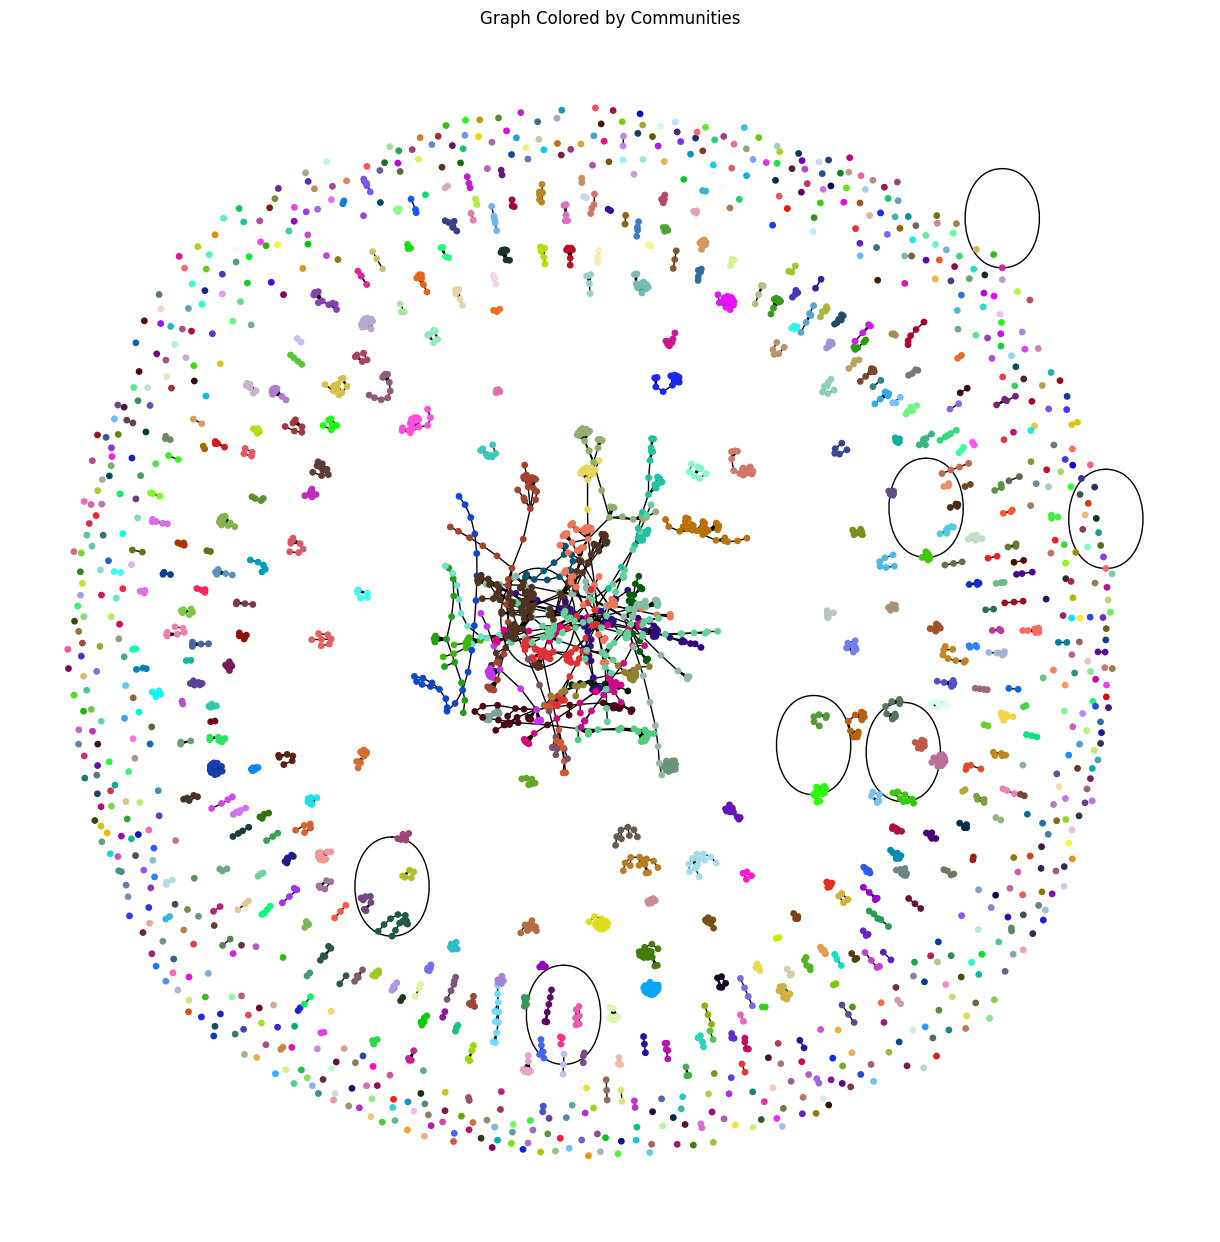

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load the graph from the GEXF file
G = nx.read_gexf("output/graph_V2.gexf")

# Assuming you already have communities identified (e.g., a dictionary)
# Example: Replace this with your actual community detection logic
# communities = {node: community_id}
# If you're using NetworkX's community detection:
from networkx.algorithms.community import greedy_modularity_communities

# Detect communities (you can replace this with your preferred method)
communities = list(greedy_modularity_communities(G))
community_map = {node: i for i, community in enumerate(communities) for node in community}

# Print the total number of nodes and communities
print(f"Total number of nodes: {G.number_of_nodes()}")
print(f"Total number of communities: {len(communities)}")

# Assign a random color to each community
community_colors = {i: f'#{random.randint(0, 0xFFFFFF):06x}' for i in range(len(communities))}
node_colors = [community_colors[community_map[node]] for node in G.nodes()]

# Draw the graph with community-based coloring
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(
    G, pos, with_labels=False, node_size=15, node_color=node_colors
)

plt.title("Graph Colored by Communities")
plt.show()


Total number of nodes (connected only): 2794
Total number of communities: 441


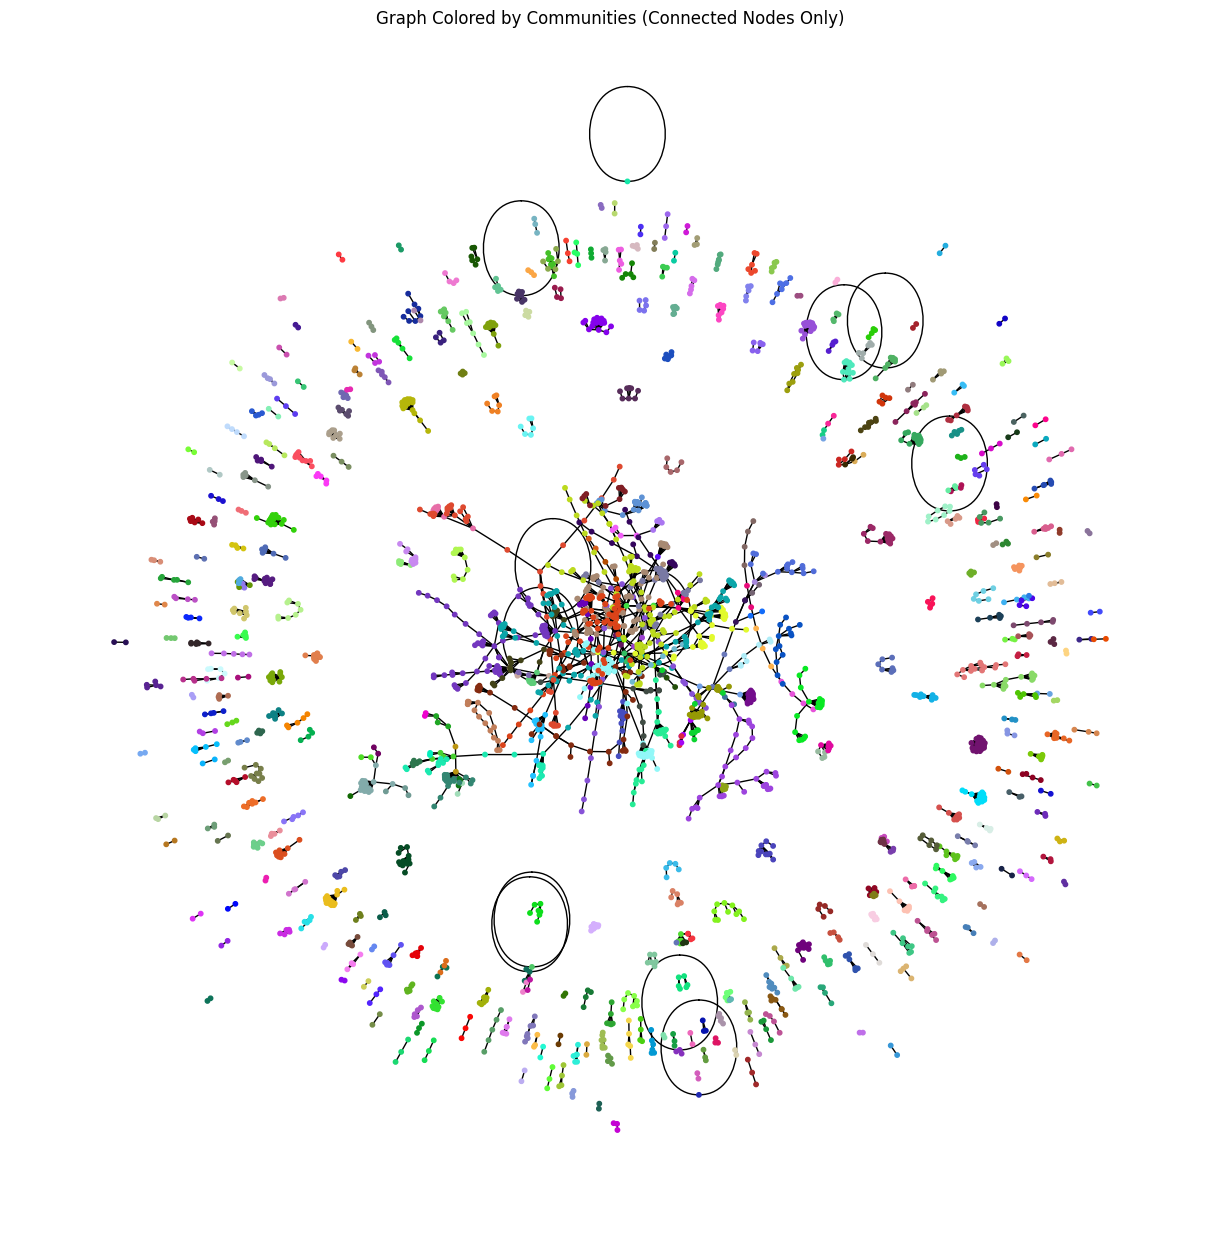

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load the graph from the GEXF file
G = nx.read_gexf("output/graph_V2.gexf")

# Filter out isolated nodes (degree = 0)
connected_nodes = [node for node in G.nodes() if G.degree(node) > 0]
H = G.subgraph(connected_nodes)  # Create a subgraph with only connected nodes

# Extract community IDs from node attributes
# Assuming the community ID is stored in an attribute called 'community_id'
community_map = {node: data['community_id'] for node, data in H.nodes(data=True)}

# Get unique community IDs
unique_communities = set(community_map.values())

# Print the total number of nodes and communities
print(f"Total number of nodes (connected only): {H.number_of_nodes()}")
print(f"Total number of communities: {len(unique_communities)}")

# Assign a random color to each community
community_colors = {community_id: f'#{random.randint(0, 0xFFFFFF):06x}' for community_id in unique_communities}
node_colors = [community_colors[community_map[node]] for node in H.nodes()]

# Draw the graph with community-based coloring
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(H, seed=42)  # Layout for better visualization
nx.draw(
    H, pos, with_labels=False, node_size=10, node_color=node_colors
)

plt.title("Graph Colored by Communities (Connected Nodes Only)")
plt.show()


In [31]:
G = nx.read_gexf("output/graph_V2.gexf")

for node, data in G.nodes(data=True):
    if (data["community_id"] == 438):
        print(data)

{'type': 'GEO', 'description': "The Australian Capital Territory capital, Canberra, is the nation's capital city, serving as the seat of federal government. As a planned city, Canberra was specifically designed to host the nation's capital, showcasing a unique blend of urban planning and architecture. Located in the southeastern part of the country, Canberra is a significant cultural and economic center, boasting a range of attractions and institutions.", 'community_id': 438, 'label': 'CANBERRA'}
